In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [151]:
training_data=[]
DATADIR = "garbage images"
Categories = ["paper","plastic","metal"]
def create_training_data():
    for category in Categories:
        path=os.path.join(DATADIR,category)
        class_num = Categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(100,100))
                training_data.append([new_array,class_num])
            except:
                pass

create_training_data()

In [152]:
print(len(training_data))

7137


In [153]:
random.shuffle(training_data)

In [154]:
X=[]
y=[]

for features,label in training_data:
    X.append(features)
    y.append(label)
X= np.array(X).reshape(-1,100,100,3)


In [155]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [156]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)
pickle_in=open("y.pickle","rb")
y=pickle.load(pickle_in)
X = X/255.0


In [157]:
# Model


In [5]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),  # New layer
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])


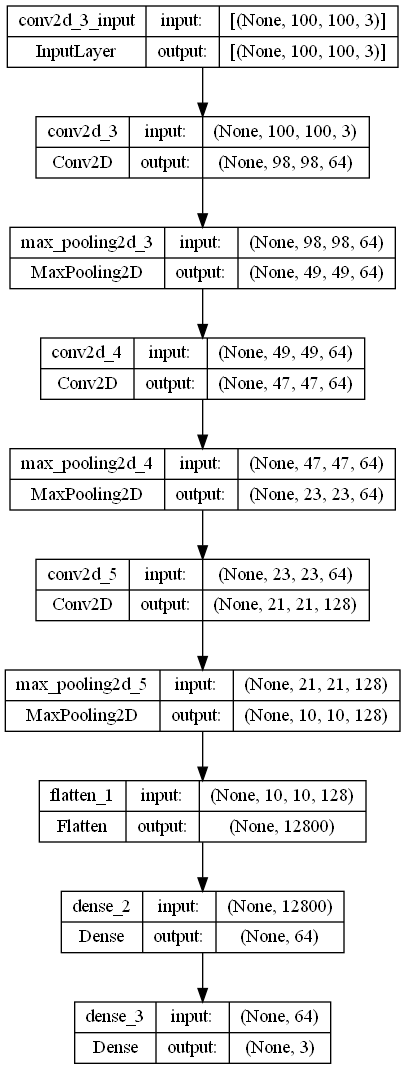

In [7]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [223]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [224]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
# Convert labels to categorical format
y_categorical = to_categorical(y, num_classes=3)

X_train, X_temp, y_train, y_temp = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Split temporary data into validation and testing sets (50% each of the 20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Training the model
history = model.fit(X_train, y_train, epochs=7, batch_size=64, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=2)])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

Epoch 1/7
90/90 [==============================] - 32s 294ms/step - loss: 0.9621 - accuracy: 0.5285 - val_loss: 0.8245 - val_accuracy: 0.6246
Epoch 2/7
90/90 [==============================] - 24s 262ms/step - loss: 0.7745 - accuracy: 0.6584 - val_loss: 0.7196 - val_accuracy: 0.7115
Epoch 3/7
90/90 [==============================] - 27s 303ms/step - loss: 0.6451 - accuracy: 0.7338 - val_loss: 0.6292 - val_accuracy: 0.7577
Epoch 4/7
90/90 [==============================] - 25s 277ms/step - loss: 0.5033 - accuracy: 0.7977 - val_loss: 0.5336 - val_accuracy: 0.8053
Epoch 5/7
90/90 [==============================] - 25s 281ms/step - loss: 0.4107 - accuracy: 0.8460 - val_loss: 0.4977 - val_accuracy: 0.8291
Epoch 6/7
90/90 [==============================] - 27s 297ms/step - loss: 0.3141 - accuracy: 0.8896 - val_loss: 0.4661 - val_accuracy: 0.8473
Epoch 7/7
90/90 [==============================] - 25s 282ms/step - loss: 0.2259 - accuracy: 0.9247 - val_loss: 0.5273 - val_accuracy: 0.8361


In [192]:
y_train_pred = model.predict(X_train)
train_auc = roc_auc_score(y_train, y_train_pred)
y_val_pred = model.predict(X_val)
val_auc = roc_auc_score(y_val, y_val_pred)

print("Training AUC:", train_auc)
print("Validation AUC:", val_auc)

# Plotting the AUC
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


179/179 [==============================] - 11s 60ms/step


NameError: name 'roc_auc_score' is not defined

In [194]:
print(len(X_test))

714


In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=5,batch_size=64)


In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])


In [193]:
model.evaluate(X_test,y_test)

23/23 [==============================] - 2s 69ms/step - loss: 0.4787 - accuracy: 0.8459


[0.47869959473609924, 0.8459383845329285]

In [ ]:
# Making prediction on a random image from test dataset

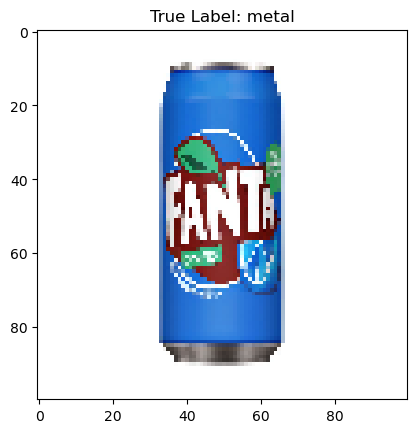

1/1 [==============================] - 0s 24ms/step
[[3.0564472e-05 3.7458196e-01 6.2538755e-01]]
2
Predicted Label: metal


In [221]:
# Select a random index from the test set
random_index = random.randint(0, len(X_test) - 1)

# Get the image and its true label
random_image = X_test[random_index]
true_label = Categories[np.argmax(y_test[random_index])]

# Reshape the image for display
image_for_display = random_image.reshape(100, 100, 3)

# Display the image


plt.imshow(image_for_display)
plt.title(f"True Label: {true_label}")
plt.show()

# Make prediction on the selected image
prediction = model.predict(np.expand_dims(random_image, axis=0))
print(prediction)
print(np.argmax(prediction))
if np.max(prediction)>0.5:
    predicted_label = Categories[np.argmax(prediction)]
    print(f"Predicted Label: {predicted_label}")
else :
    print("Cannot determine")

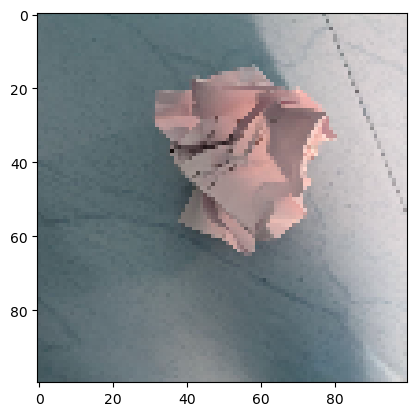

1/1 [==============================] - 0s 32ms/step
metal


In [217]:
image_path="test2.jpg"
img1 = cv2.imread(image_path)

img_array1 = cv2.resize(img1, (100, 100))  # Resize the image to match the model's expected sizing
img_array1 = np.expand_dims(img_array1, axis=0)  # Add batch dimension
img_array1 = img_array1 / 255.0  # Normalize pixel values to between 0 and 1
image_for_display = img_array1.reshape(100, 100, 3)

# Display the image
plt.imshow(image_for_display)
plt.show()

# Make predictions
predictions = model.predict(img_array1)

predicted_label = Categories[np.argmax(predictions)]  # Assuming 'Categories' is defined in your code

# Display the image and prediction
print(predicted_label)


In [196]:
model.save("final_trashbot.h5")

23/23 [==============================] - 2s 63ms/step
Confusion Matrix:
[[230  15  23]
 [ 18 225  17]
 [  3  11 172]]


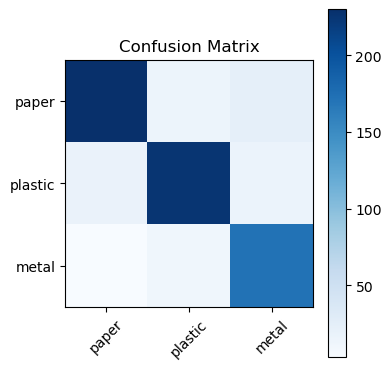

In [218]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
y_pred = model.predict(X_test)

# Convert predicted categories to one-hot encoded labels (for confusion matrix)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix (optional)
plt.figure(figsize=(4, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(Categories))
plt.xticks(tick_marks, Categories, rotation=45)
plt.yticks(tick_marks, Categories)
plt.tight_layout()
plt.show()



In [ ]:
print (len(X_test))

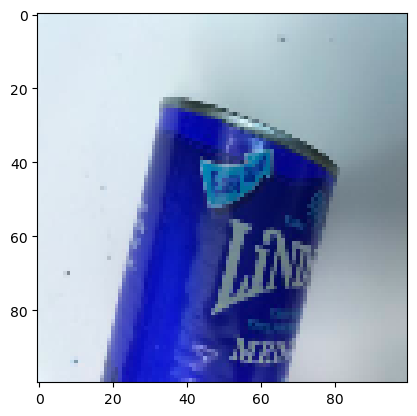

1/1 [==============================] - 0s 40ms/step
[[2.1062631e-03 1.1153624e-06 9.9789268e-01]]


In [219]:
idx2 = random.randint(0,len(X_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
print(y_pred)

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(Categories)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

# Calculate precision, accuracy, and recall
precision = precision_score(y_test.argmax(axis=1), y_pred_classes, average='weighted')
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred_classes)
recall = recall_score(y_test.argmax(axis=1), y_pred_classes, average='weighted')
f1 = f1_score(y_test.argmax(axis=1), y_pred_classes, average='weighted')

# Print precision, accuracy, and recall
print("Precision:", precision)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)


In [ ]:
model.sa